# Exchange Rate Data Retrieval

In [7]:
import requests
from datetime import date, timedelta
import json
import pandas as pd
import logging

def fetch_exchange_rates(base_currency, target_currency, start_date, end_date, access_key):
    base_url = "https://api.exchangeratesapi.io/v1/"
    rates_data = {}

    current_date = start_date
    while current_date <= end_date:
        endpoint = f"{current_date}?access_key={access_key}&base={base_currency}&symbols={target_currency}"
        url = base_url + endpoint

        try:
            response = requests.get(url)
            if response.status_code == 200:
                data = response.json()
                rates_data[current_date.strftime("%Y-%m-%d")] = data['rates'].get(target_currency)
            else:
                response.raise_for_status()
        except requests.exceptions.HTTPError as e:
            print(f"HTTP error occurred: {e}")
        except requests.exceptions.RequestException as e:
            print(f"Request error occurred: {e}")
        except KeyError as e:
            print(f"Key error occurred: {e}")
        except Exception as e:
            print(f"An unexpected error occurred: {e}")

        current_date += timedelta(days=1)

    return rates_data

def load_access_key(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
        return data['exchange_rate_access_key']

def main():
    # Setting up logging
    logging.basicConfig(filename='exchange_rate.log', level=logging.ERROR)

    # Load the access key from the config file
    access_key = load_access_key("config.json")
    if access_key is None:
        logging.error("Access key is missing.")
        return
    base_currency = "AUD"
    target_currency = "NZD"
    end_date = date.today()
    start_date = end_date - timedelta(days=30)

    # Load the access key from the config file
    access_key = load_access_key("config.json")

    exchange_rates_data = fetch_exchange_rates(base_currency, target_currency, start_date, end_date, access_key)

    with open('exchange_rates_data.json', 'w') as json_file:
        json.dump(exchange_rates_data, json_file)
    
    print(json.dumps(exchange_rates_data, indent=4))
        
if __name__ == "__main__":
    main()


{
    "2024-03-23": 1.08671,
    "2024-03-24": 1.087848,
    "2024-03-25": 1.089551,
    "2024-03-26": 1.088494,
    "2024-03-27": 1.088443,
    "2024-03-28": 1.090575,
    "2024-03-29": 1.092528,
    "2024-03-30": 1.092006,
    "2024-03-31": 1.091324,
    "2024-04-01": 1.090011,
    "2024-04-02": 1.09135,
    "2024-04-03": 1.092221,
    "2024-04-04": 1.09296,
    "2024-04-05": 1.094081,
    "2024-04-06": 1.094081,
    "2024-04-07": 1.094269,
    "2024-04-08": 1.094635,
    "2024-04-09": 1.092911,
    "2024-04-10": 1.089218,
    "2024-04-11": 1.089925,
    "2024-04-12": 1.091705,
    "2024-04-13": 1.091705,
    "2024-04-14": 1.089229,
    "2024-04-15": 1.091474,
    "2024-04-16": 1.088435,
    "2024-04-17": 1.089135,
    "2024-04-18": 1.088364,
    "2024-04-19": 1.089674,
    "2024-04-20": 1.089674,
    "2024-04-21": 1.089147,
    "2024-04-22": 1.089444
}


# Data Preprocessing and Analysis

In [34]:
import pandas as pd
import json

def preprocess_and_analyze():
    # Load the data from JSON file
    with open('exchange_rates_data.json', 'r') as json_file:
        exchange_rates_data = json.load(json_file)

    # Create DataFrame
    df = pd.DataFrame.from_dict(exchange_rates_data, orient='index', columns=['Exchange Rate'])

    # Preprocess the data
    # Convert the index to datetime
    df.index = pd.to_datetime(df.index, errors='coerce')

    # Drop any rows with missing values
    df.dropna(inplace=True)

    # Convert Exchange Rate column to numeric
    df['Exchange Rate'] = pd.to_numeric(df['Exchange Rate'], errors='coerce')

    try:
        # Find the best and worst exchange rates
        best_exchange_rate = df['Exchange Rate'].idxmax(), df['Exchange Rate'].max()
        worst_exchange_rate = df['Exchange Rate'].idxmin(), df['Exchange Rate'].min()

        print("Best Exchange Rate:")
        print(f"Date: {best_exchange_rate[0]}, Rate: {best_exchange_rate[1]}")

        print("\nWorst Exchange Rate:")
        print(f"Date: {worst_exchange_rate[0]}, Rate: {worst_exchange_rate[1]}")

        # Calculate the average exchange rate for the month
        average_exchange_rate = df['Exchange Rate'].mean()

        print("\nAverage Exchange Rate for the Month:")
        print(f"{average_exchange_rate:.4f}")

        # Display basic statistics
        print("\nBasic Statistics:")
        print(f"min: {df['Exchange Rate'].min():.6f}")
        print(f"max: {df['Exchange Rate'].max():.6f}")
        
        return df, best_exchange_rate, worst_exchange_rate, average_exchange_rate 
    except Exception as e:
        logging.error(f"An unexpected error occurred: {e}")

exchange_rate_df, best_exchange_rate, worst_exchange_rate, average_exchange_rate = preprocess_and_analyze()  # Assign the DataFrame and other values to variables


Best Exchange Rate:
Date: 2024-04-08 00:00:00, Rate: 1.094635

Worst Exchange Rate:
Date: 2024-03-23 00:00:00, Rate: 1.08671

Average Exchange Rate for the Month:
1.0907

Basic Statistics:
min: 1.086710
max: 1.094635


In [35]:
# Display the data
exchange_rate_df

,Exchange Rate
2024-03-23,1.086710
2024-03-24,1.087848
2024-03-25,1.089551
2024-03-26,1.088494
2024-03-27,1.088443
2024-03-28,1.090575
2024-03-29,1.092528
2024-03-30,1.092006
2024-03-31,1.091324
2024-04-01,1.090011


# Exchange Rate Data Visualization

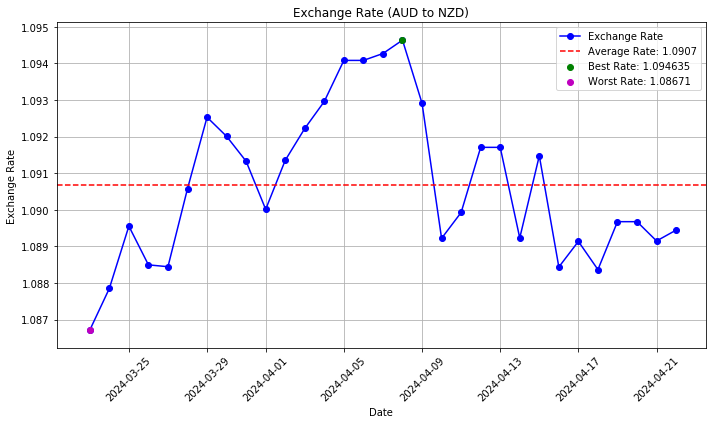

In [36]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(exchange_rate_df.index, exchange_rate_df['Exchange Rate'], marker='o', linestyle='-', color='b', label='Exchange Rate')
plt.axhline(y=average_exchange_rate, color='r', linestyle='--', label=f'Average Rate: {average_exchange_rate:.4f}')
plt.scatter(best_exchange_rate[0], best_exchange_rate[1], color='g', label=f'Best Rate: {best_exchange_rate[1]}', zorder=5)
plt.scatter(worst_exchange_rate[0], worst_exchange_rate[1], color='m', label=f'Worst Rate: {worst_exchange_rate[1]}', zorder=5)
plt.title('Exchange Rate (AUD to NZD)')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Test Cases

In [37]:
import os

def test_successful_run():
    """
    Test successful execution.
    """
    try:
        main()
        with open('exchange_rates_data.json', 'r') as json_file:
            exchange_rates_data = json.load(json_file)

        assert exchange_rates_data is not None
        assert 'exchange_rate.log' in os.listdir()
        assert len(exchange_rates_data) == 30, f"Data Length: {len(exchange_rates_data)}"

        preprocess_and_analyze()
    except AssertionError as e:
        logging.error(f"Test failed: {e}")
    
def test_failure_fetching_data():
    """
    Test failure in fetching data.
    """
    with open('config.json', 'r') as f:
        data = json.load(f)
        data['exchange_rate_access_key'] = 'INVALID_KEY'
    
    with open('config.json', 'w') as f:
        json.dump(data, f)

    main()

    with open('exchange_rate.log', 'r') as f:
        content = f.read()
        assert "HTTP error occurred" in content
        
if __name__ == "__main__":
    test_successful_run()
    test_failure_fetching_data()

{
    "2024-03-23": 1.08671,
    "2024-03-24": 1.087848,
    "2024-03-25": 1.089551,
    "2024-03-26": 1.088494,
    "2024-03-27": 1.088443,
    "2024-03-28": 1.090575,
    "2024-03-29": 1.092528,
    "2024-03-30": 1.092006,
    "2024-03-31": 1.091324,
    "2024-04-01": 1.090011,
    "2024-04-02": 1.09135,
    "2024-04-03": 1.092221,
    "2024-04-04": 1.09296,
    "2024-04-05": 1.094081,
    "2024-04-06": 1.094081,
    "2024-04-07": 1.094269,
    "2024-04-08": 1.094635,
    "2024-04-09": 1.092911,
    "2024-04-10": 1.089218,
    "2024-04-11": 1.089925,
    "2024-04-12": 1.091705,
    "2024-04-13": 1.091705,
    "2024-04-14": 1.089229,
    "2024-04-15": 1.091474,
    "2024-04-16": 1.088435,
    "2024-04-17": 1.089135,
    "2024-04-18": 1.088364,
    "2024-04-19": 1.089674,
    "2024-04-20": 1.089674,
    "2024-04-21": 1.089147,
    "2024-04-22": 1.0895
}
HTTP error occurred: 401 Client Error: Unauthorized for url: https://api.exchangeratesapi.io/v1/2024-03-23?access_key=INVALID_KEY&base